# NVIDIA GPU Memory Grapher
A little tool that graphs memory usage using *`nvidia-smi`*

The graph loops forever, resetting every *`period_secs`* seconds.

In [8]:
%matplotlib inline
import time
import pylab as pl
import seaborn # Comment this out if you don't want/have have seaborn. It just makes the graph prettier.
from IPython import display

In [9]:
def nvidia_stats():
    out = !nvidia-smi --display=MEMORY -q
    total = int(out[9].split()[2])
    units = out[10].split()[3]
    used = out[10].split()[2]
    return total, used, units

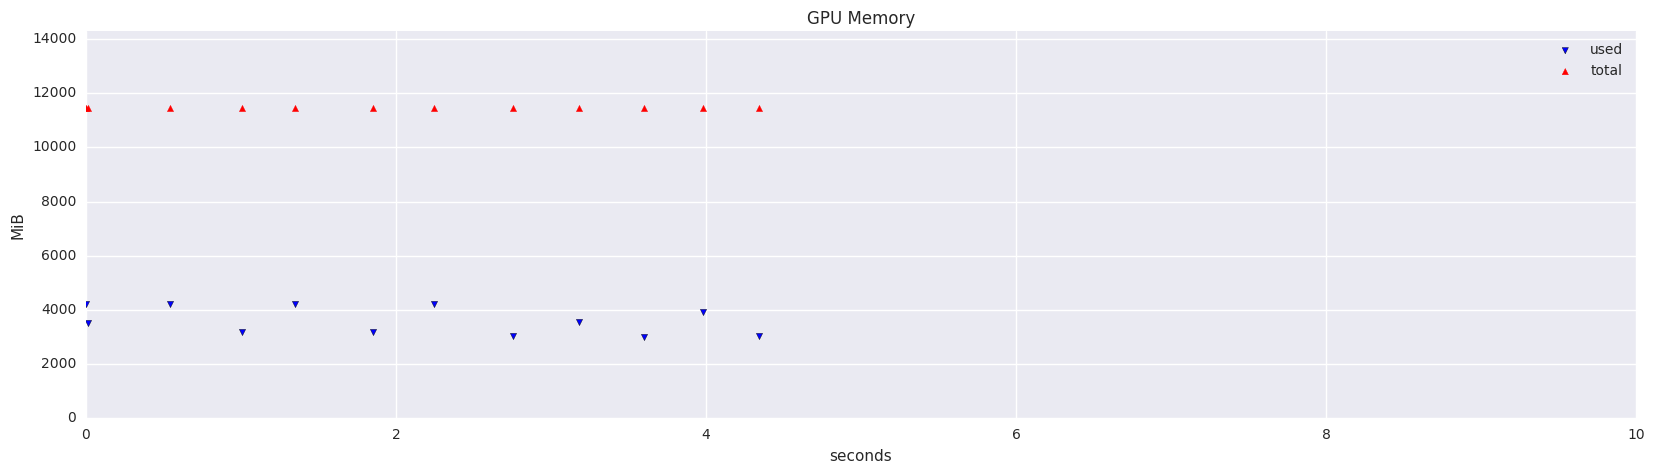

In [ ]:
period_secs=10
while True:
    # Do some initialization so that we have a legend and labels
    total, used, units = nvidia_stats()
    pl.figure(figsize=(20,5))
    pl.scatter(0, used, label='used', marker='v')
    pl.scatter(0, total, marker='^', color='r', label='total')
    pl.legend()
    pl.ylabel(units)
    pl.title("GPU Memory")
    pl.xlim(0, period_secs)
    pl.ylim(0, total*1.25)
    pl.xlabel('seconds')

    start_time = time.time()
    x = 0
    while x < period_secs:
        _, used, _ = nvidia_stats()
        
        # use time instead of a constant period because matplotlib is slow
        x = time.time() - start_time
        
        pl.scatter(x, used, label='used', marker='v')
        pl.scatter(x, total, marker='^', color='r', label='total')

        display.clear_output(wait=True)
        display.display(pl.gcf())
    display.display(pl.cla())